# Faz a rasterização das máscaras de rótulos do Áreas Urbanizadas 2019

In [1]:
# imports

import os
import sys
sys.path.append(os.path.abspath('..'))

import src.data.mask_processing as mask_processing

### É feito um mapeamento dos tipos e densidades em índices

In [2]:
mask_processing.label_mapping

{('Loteamento vazio', 'Loteamento vazio'): 1,
 ('Outros equipamentos urbanos', 'Pouco densa'): 2,
 ('Outros equipamentos urbanos', 'Densa'): 3,
 ('Vazio intraurbano', 'Pouco densa'): 4,
 ('Vazio intraurbano', 'Densa'): 5,
 ('Vazio intraurbano remanescente', 'Pouco densa'): 6,
 ('Vazio intraurbano remanescente', 'Densa'): 7,
 ('Área urbanizada', 'Pouco densa'): 8,
 ('Área urbanizada', 'Densa'): 9}

### Exemplo de uso: precisa do shapefile do AreasUrbanizadas e a grade do BDC.

A classe que controla a rasterização é instanciada, e é feita a rasterização do tile 032027\
A rasterização é feita uma vez para cada índice acima, em ordem decrescente.\
Assim os índices menores não são sobrepostos pelos maiores (que são geralmente as areas urbanizadas densas)\
Por exemplo, uma área que contém vazio interurbano dentro de uma área urbanizada vai ser corretamente identificada.


In [3]:
# Example usage
working_dir = os.path.abspath('..')

urban_shp_path = os.path.join(working_dir, "data/masks/AreasUrbanizadas2019_Brasil/AU_2022_AreasUrbanizadas2019_Brasil.shp")
bdc_grid_path = os.path.join(working_dir, "data/grids/BDC_SM_V2/BDC_SM_V2Polygon.shp")
custom_crs_wkt = 'PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown based on GRS80 ellipsoid",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",-12],PARAMETER["longitude_of_center",-54],PARAMETER["standard_parallel_1",-2],PARAMETER["standard_parallel_2",-22],PARAMETER["false_easting",5000000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'


rasterizer = mask_processing.RasterizeMasks(urban_shp_path, bdc_grid_path, custom_crs_wkt)

mask = rasterizer.raster_tile('032027')




Rasterizing id 9: (('Área urbanizada', 'Densa'), 9)
Rasterizing id 8: (('Área urbanizada', 'Pouco densa'), 8)
Rasterizing id 5: (('Vazio intraurbano', 'Densa'), 5)
Rasterizing id 4: (('Vazio intraurbano', 'Pouco densa'), 4)
Rasterizing id 3: (('Outros equipamentos urbanos', 'Densa'), 3)
Rasterizing id 2: (('Outros equipamentos urbanos', 'Pouco densa'), 2)
Rasterizing id 1: (('Loteamento vazio', 'Loteamento vazio'), 1)


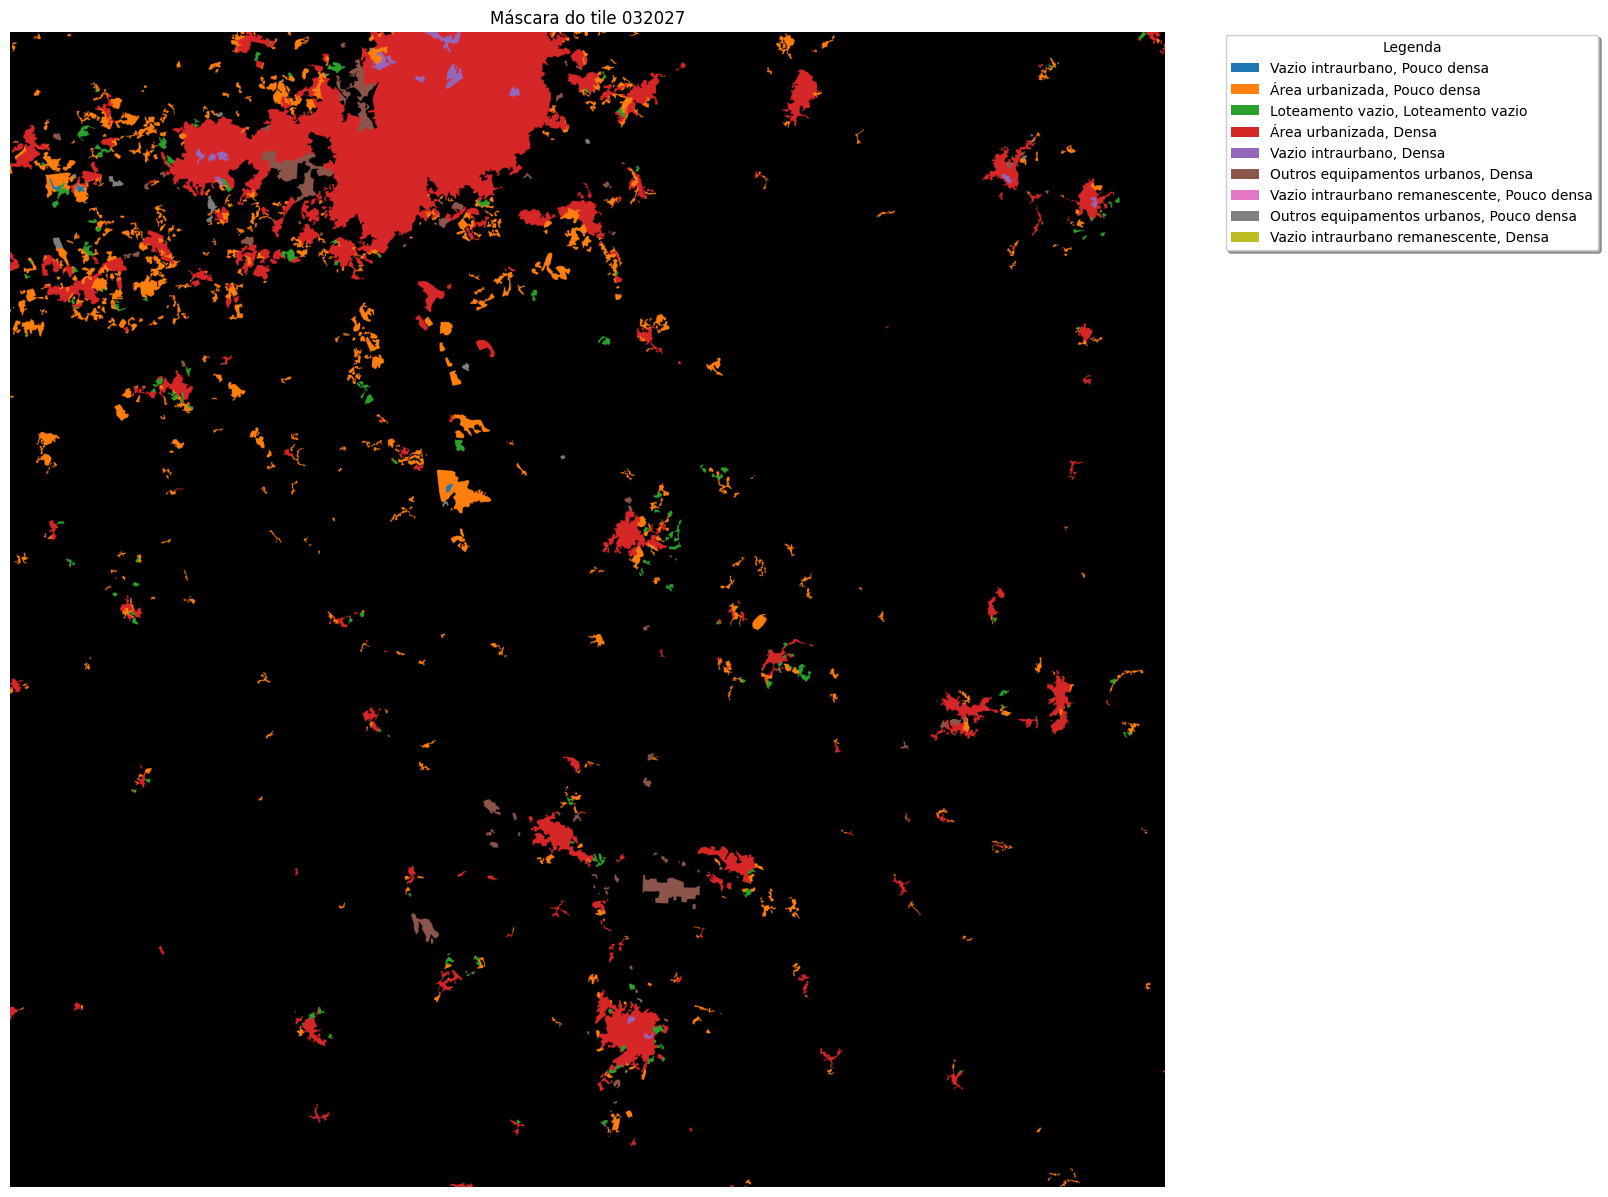

In [4]:
rasterizer.plot()

### Salvamento da máscara rasterizada

In [5]:
rasterizer.save_raster(os.path.join(working_dir,"data/masks"))

Saving as /home/jonathan/UrbanizedAreasSegmentation/data/masks/mask_raster_032027.tif


#### Também há a opção de obter apenas a informação de densidade

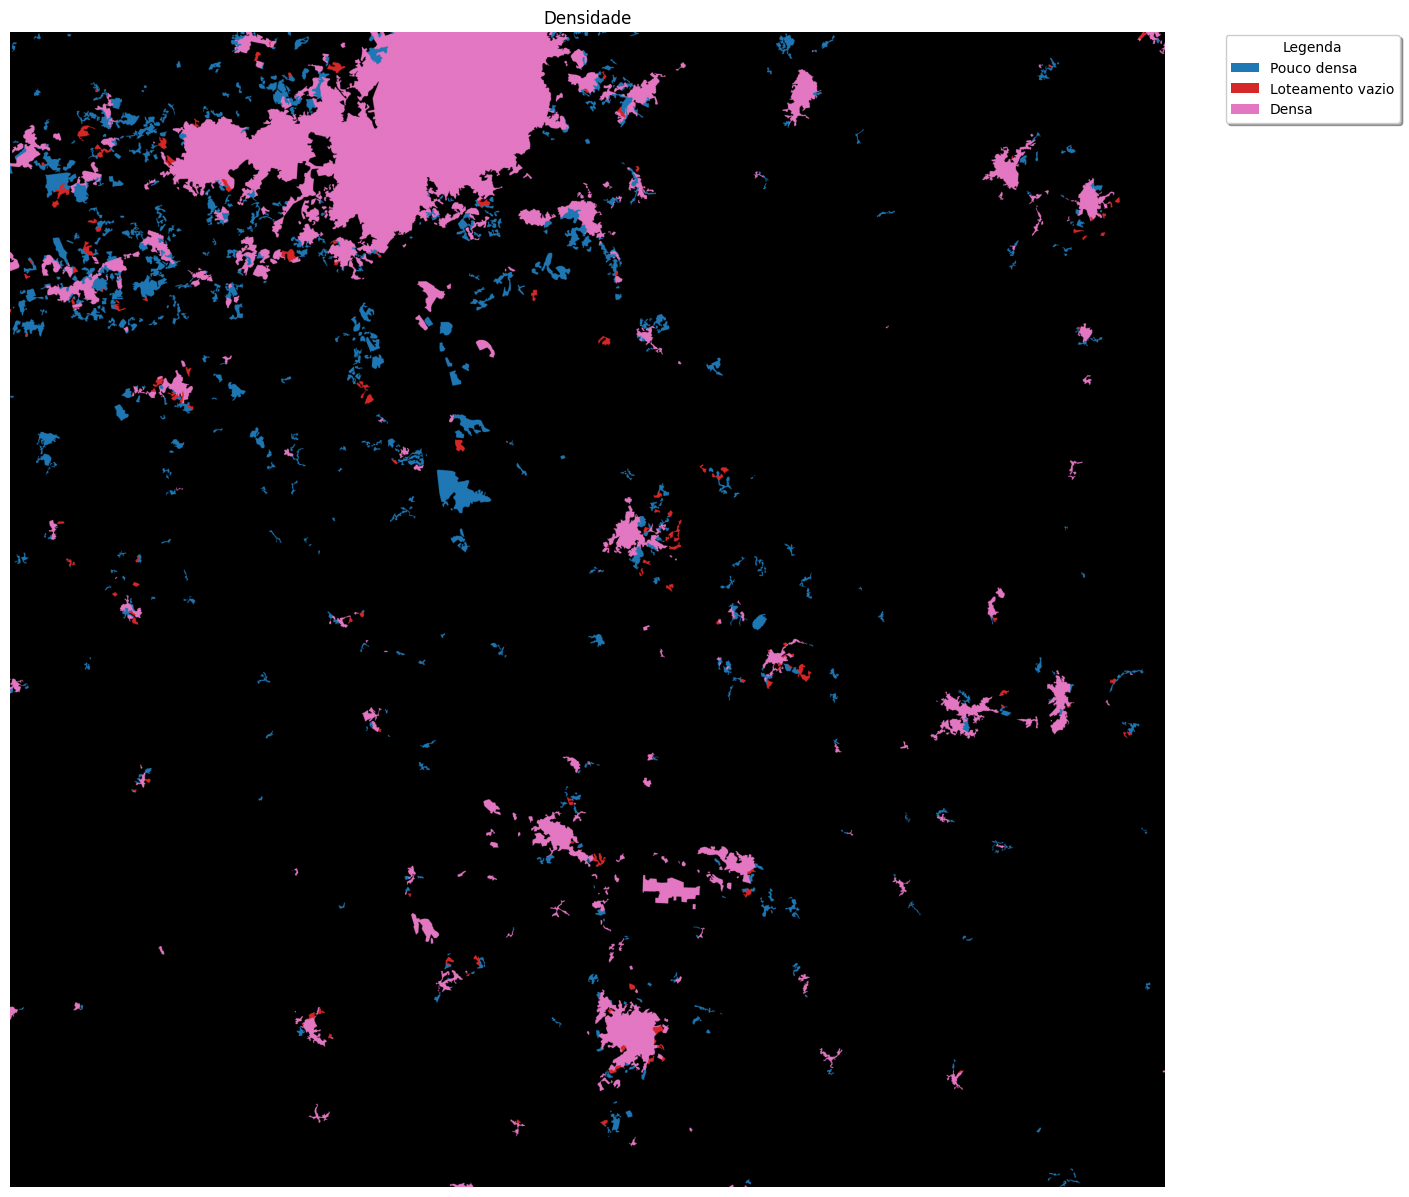

In [6]:
mask_processing.plot_mask(mask, title="Densidade", mapping = 'densidade')

#### E de tipo

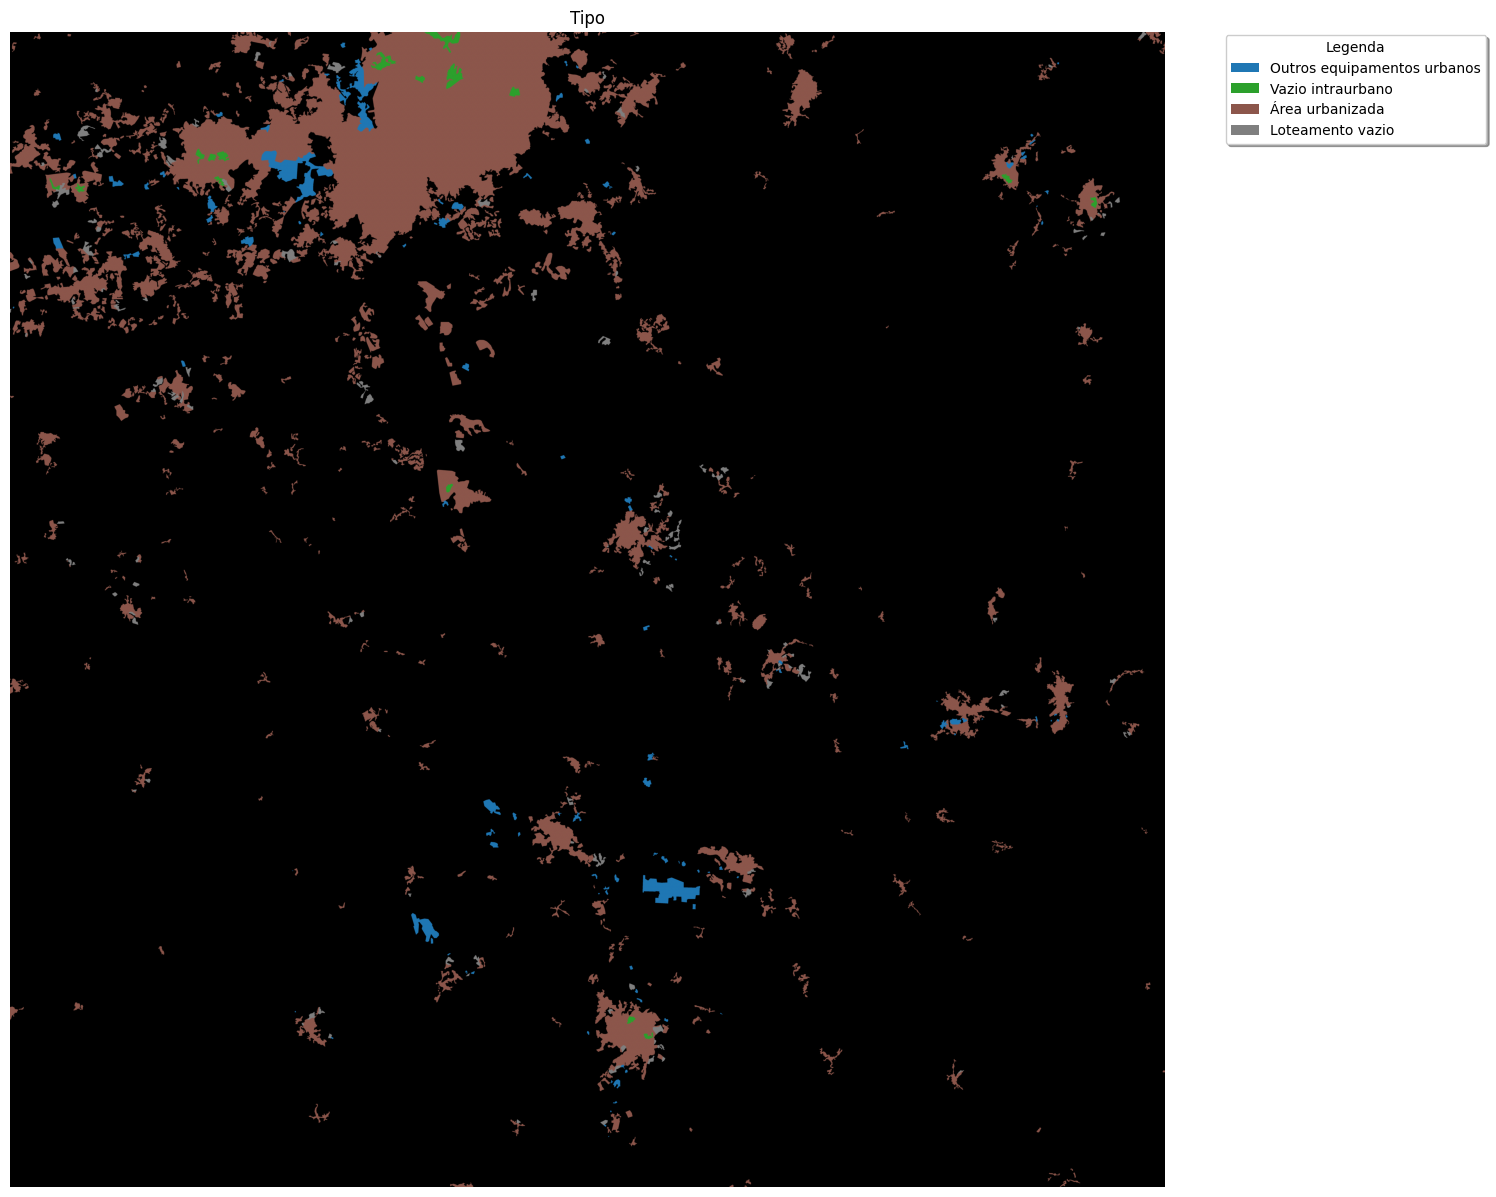

In [7]:
mask_processing.plot_mask(mask, title="Tipo", mapping = 'tipo')

###### Exemplo para se salvar alguns tiles

Aqui rasterizamos e salvamos os tiles vizinhos do 032027 em MG, e o tile 025037 em RS  

In [8]:
tiles = ['032027', '032026', '032028','031027','033027', '025037']

for tile in tiles:
    mask = rasterizer.raster_tile(tile, save_path=os.path.join(working_dir,"data/masks"))

Rasterizing id 9: (('Área urbanizada', 'Densa'), 9)
Rasterizing id 8: (('Área urbanizada', 'Pouco densa'), 8)
Rasterizing id 5: (('Vazio intraurbano', 'Densa'), 5)
Rasterizing id 4: (('Vazio intraurbano', 'Pouco densa'), 4)
Rasterizing id 3: (('Outros equipamentos urbanos', 'Densa'), 3)
Rasterizing id 2: (('Outros equipamentos urbanos', 'Pouco densa'), 2)
Rasterizing id 1: (('Loteamento vazio', 'Loteamento vazio'), 1)
Saving as /home/jonathan/UrbanizedAreasSegmentation/data/masks/mask_raster_032027.tif
Rasterizing id 9: (('Área urbanizada', 'Densa'), 9)
Rasterizing id 8: (('Área urbanizada', 'Pouco densa'), 8)
Rasterizing id 7: (('Vazio intraurbano remanescente', 'Densa'), 7)
Rasterizing id 6: (('Vazio intraurbano remanescente', 'Pouco densa'), 6)
Rasterizing id 5: (('Vazio intraurbano', 'Densa'), 5)
Rasterizing id 4: (('Vazio intraurbano', 'Pouco densa'), 4)
Rasterizing id 3: (('Outros equipamentos urbanos', 'Densa'), 3)
Rasterizing id 2: (('Outros equipamentos urbanos', 'Pouco densa'